In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
df_train = pd.read_csv('Train_Dataset.csv')
df_test= pd.read_csv('Test_Dataset.csv')

In [4]:
def drop_columns(df,columns):
    df.drop(columns,axis=1,inplace=True,errors='ignore')

In [5]:
def drop_duplicates(df):
    df_train.drop_duplicates(inplace=True)

In [6]:
df_baseline_train = df_train.copy()
df_baseline_test = df_test.copy()

In [7]:
drop_features =['customer_id','Unnamed: 19','Unnamed: 20']
drop_columns(df_train,drop_features)
drop_columns(df_test,drop_features)

In [8]:
# df_train.duplicated().sum(),df_test.duplicated().sum()

In [9]:
drop_duplicates(df_train)
# df_train.duplicated().sum()

In [10]:
df_train.dropna(inplace=True,subset=['Churn'])
# df_train.isnull().sum()

In [11]:
def mark_minus_invalids_as_nan(df,columns):
    for col in columns:
        # df[df[col]<0][col]=np.nan
        df.loc[df[col]<0,col]=np.nan

In [12]:
def find_minus(df,columns):
    for col in columns:
        print(col," = ",df[df[col]<0].shape[0])

In [13]:
categorical = ['intertiol_plan', 'voice_mail_plan', 'Churn', 'location_code']
numerical =['account_length',
            'number_vm_messages',
            'total_day_min',
            'total_day_calls',
            'total_day_charge',
            'total_eve_min',
            'total_eve_calls',
            'total_eve_charge',
            'total_night_minutes',
            'total_night_calls',
            'total_night_charge',
            'total_intl_minutes',
            'total_intl_calls',
            'total_intl_charge',
            'customer_service_calls']

In [14]:
find_minus(df_train,columns=numerical)

account_length  =  0
number_vm_messages  =  1
total_day_min  =  4
total_day_calls  =  1
total_day_charge  =  2
total_eve_min  =  1
total_eve_calls  =  2
total_eve_charge  =  0
total_night_minutes  =  0
total_night_calls  =  0
total_night_charge  =  0
total_intl_minutes  =  3
total_intl_calls  =  0
total_intl_charge  =  0
customer_service_calls  =  0


In [15]:
mark_minus_invalids_as_nan(df_train,numerical)
df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        4
total_day_min             5
total_day_calls           4
total_day_charge          7
total_eve_min             4
total_eve_calls           6
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        5
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     0
dtype: int64

In [16]:
df_train.describe()

,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,2310.000000,2312.000000,2308.000000,2307.000000,2308.000000,2305.000000,2308.000000,2306.000000,2304.000000,2310.000000,2307.000000,2307.000000,2307.000000,2309.000000,2307.000000,2311.000000
mean,101.327706,473.525519,7.677643,183.240442,105.405113,30.997748,203.729593,100.247615,17.129679,209.506234,87.628088,9.435063,10.272909,4.441317,2.773658,1.651233
std,39.940975,42.039577,13.589342,72.313433,221.564188,9.750026,115.568962,19.842609,4.325082,408.843713,12.744009,18.691696,2.715550,2.461955,0.733441,1.429572
min,1.000000,445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,445.000000,0.000000,144.200000,87.000000,24.500000,166.150000,87.000000,14.180000,167.325000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000
50%,101.000000,452.000000,0.000000,180.500000,102.000000,30.600000,202.550000,101.000000,17.220000,201.050000,90.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,452.000000,14.250000,221.000000,115.000000,37.590000,236.425000,114.000000,20.090000,234.975000,98.000000,10.580000,12.000000,6.000000,3.240000,2.000000
max,232.000000,547.000000,51.000000,2283.900000,10700.000000,60.960000,5186.400000,170.000000,30.830000,19700.000000,105.000000,900.150000,18.300000,20.000000,4.940000,9.000000


In [17]:
suggested_bounds = {'account_length': [0, 250],
          'number_vm_messages': [0, 51],
          'total_day_min': [0, 500],
          'total_day_calls': [0, 800],
          'total_day_charge': [0, 61],
          'total_eve_min': [0, 800],
          'total_eve_calls': [0, 170],
          'total_eve_charge': [0, 31],
          'total_night_minutes': [0,800],
          'total_night_calls': [0, 175],
          'total_night_charge': [0, 200],
          'total_intl_minutes': [0, 25],
          'total_intl_calls': [0, 20],
          'total_intl_charge': [0, 10],
          'customer_service_calls': [0,10]}

In [18]:
df_test.describe()

,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,1500.000000,1498.000000,1499.000000,1497.000000,1497.000000,1496.000000,1498.000000,1500.00000,1491.000000,1497.000000,1498.000000,1498.000000,1498.000000,1497.000000,1500.000000,1499.000000
mean,101.042000,475.508678,7.805871,184.498798,100.085504,31.314693,203.982443,100.03400,17.321415,201.957448,119.414553,9.093071,10.326101,4.409486,2.789387,1.638426
std,39.454167,43.035587,13.376356,56.977595,20.531492,10.014655,51.534663,19.99495,4.366784,50.607989,10.920603,2.223011,2.917300,2.538735,0.787599,1.385127
min,1.000000,445.000000,0.000000,2.600000,-85.000000,-46.480000,42.500000,44.00000,3.610000,-207.400000,105.000000,1.970000,0.000000,-5.000000,0.000000,0.000000
25%,73.000000,452.000000,0.000000,144.600000,87.000000,24.642500,168.325000,87.00000,14.270000,168.400000,111.000000,7.580000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,452.000000,0.000000,184.100000,100.000000,31.300000,203.850000,100.00000,17.330000,203.500000,117.000000,9.140000,10.300000,4.000000,2.795000,1.000000
75%,127.250000,547.000000,18.000000,222.100000,113.000000,37.857500,238.175000,113.00000,20.210000,236.200000,125.000000,10.647500,12.300000,6.000000,3.320000,2.000000
max,243.000000,547.000000,50.000000,345.300000,157.000000,59.360000,363.700000,168.00000,30.910000,381.900000,175.000000,17.190000,20.000000,18.000000,5.400000,9.000000


In [19]:
# import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def check_outliers_by_visualisation(df,features):
    x=len(features)
    fig, axs = plt.subplots(x, 2, figsize=(10, 4*x))
    for i,f in enumerate(features):
        # print(i,f)
        sns.distplot(df[f],rug=True,ax=axs[i][0])
        sns.boxplot(x =f, data = df,ax=axs[i][1])
    plt.show()

In [21]:
# check_outliers_by_visualisation(df_train,numerical)

In [22]:
# check_outliers_by_visualisation(df_test,numerical)

<AxesSubplot:>

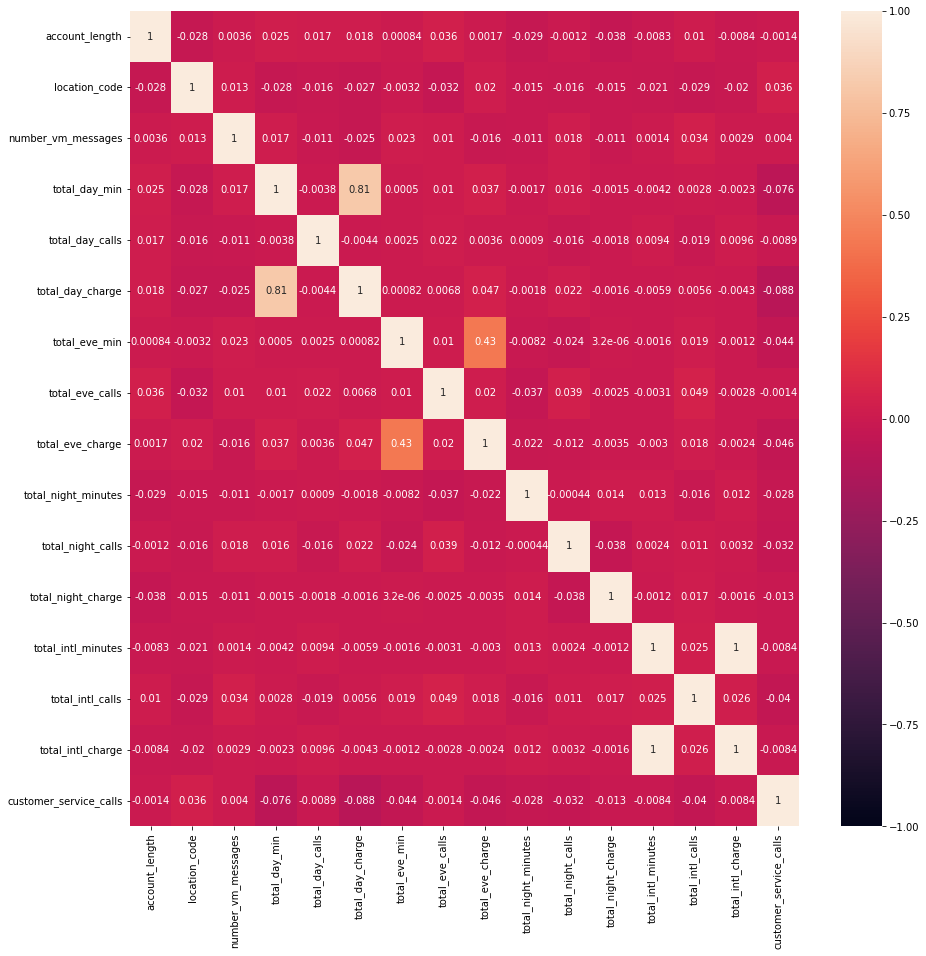

In [23]:
corr_train = df_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_train, vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

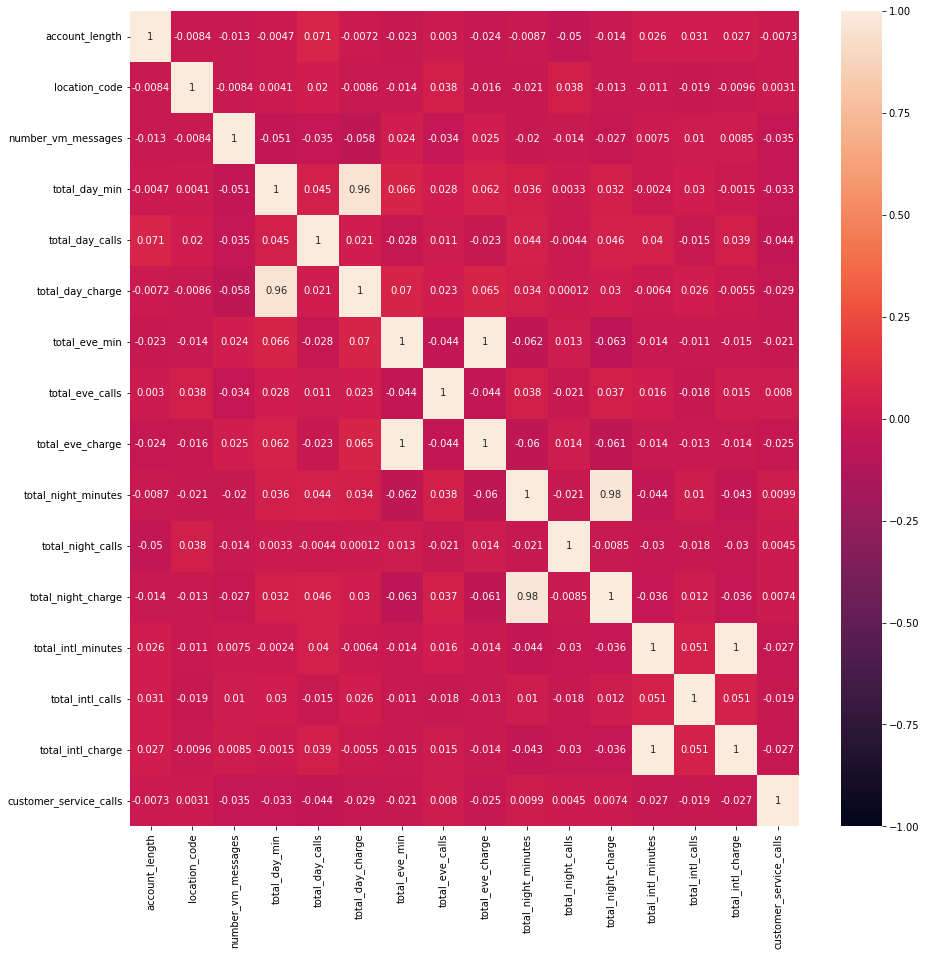

In [24]:
corr_test = df_test.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_test, vmin=-1, vmax=1, annot=True)

In [25]:
def set_nan(df,bounds):
    data = df.copy()
    for key in bounds.keys():
        # print("values",bounds[key])
        data.loc[data[key] < bounds[key][0] , key] = np.nan
        data.loc[data[key] > bounds[key][1] , key] = np.nan
    return data

In [26]:
df_train = set_nan(df_train,suggested_bounds)
df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        4
total_day_min             6
total_day_calls           5
total_day_charge          7
total_eve_min             5
total_eve_calls           6
total_eve_charge          8
total_night_minutes       3
total_night_calls         5
total_night_charge        6
total_intl_minutes        5
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     0
dtype: int64

In [27]:
#previous=====================================================
# account_length,2
# location_code,0
# intertiol_plan,3
# voice_mail_plan,6
# number_vm_messages,4
# total_day_min,5
# total_day_calls,4
# total_day_charge,7
# total_eve_min,4
# total_eve_calls,6
# total_eve_charge,8
# total_night_minutes,2
# total_night_calls,5
# total_night_charge,5
# total_intl_minutes,5
# total_intl_calls,3
# total_intl_charge,5
# customer_service_calls,1
# Churn,0

# account_length,2
# location_code,0
# intertiol_plan,3
# voice_mail_plan,6
# number_vm_messages,4
# total_day_min,6
# total_day_calls,5
# total_day_charge,7
# total_eve_min,5
# total_eve_calls,6
# total_eve_charge,8
# total_night_minutes,3
# total_night_calls,5
# total_night_charge,6
# total_intl_minutes,5
# total_intl_calls,3
# total_intl_charge,5
# customer_service_calls,1
# Churn,0


In [28]:
df_test = set_nan(df_test,suggested_bounds)
# df_train.isnull().sum()

<AxesSubplot:>

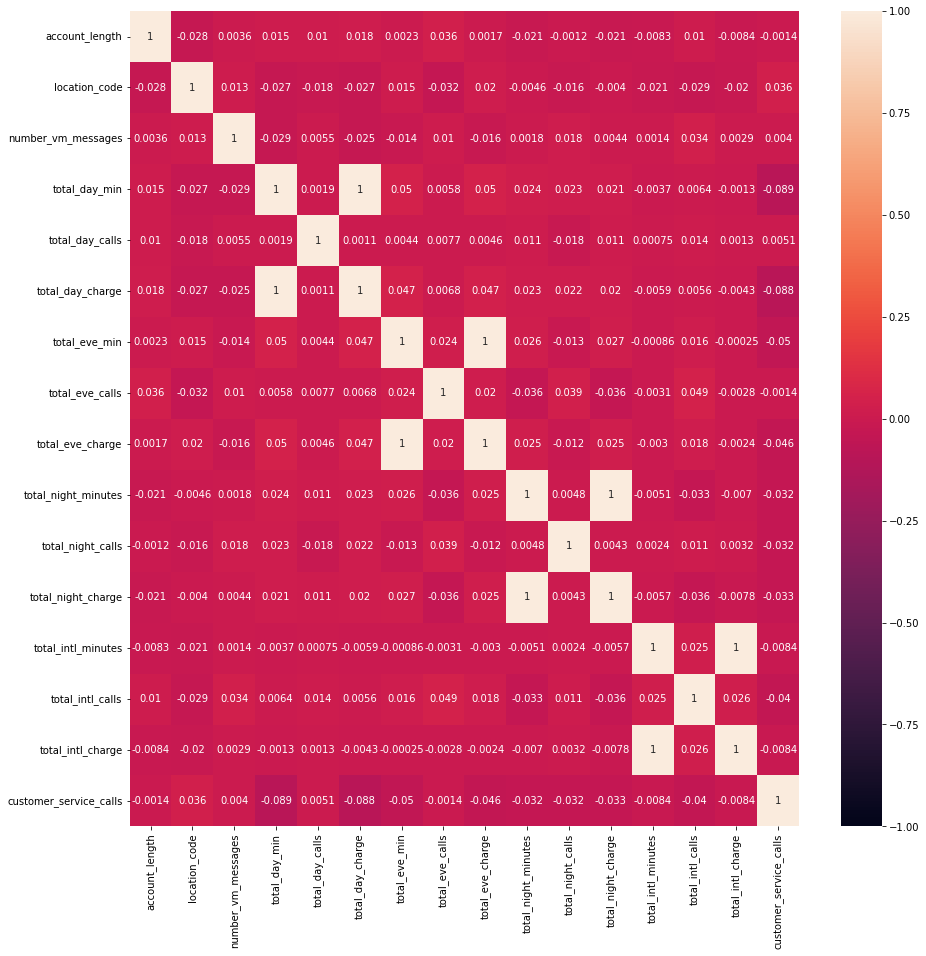

In [29]:
corr_train_2 = df_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_train_2, vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

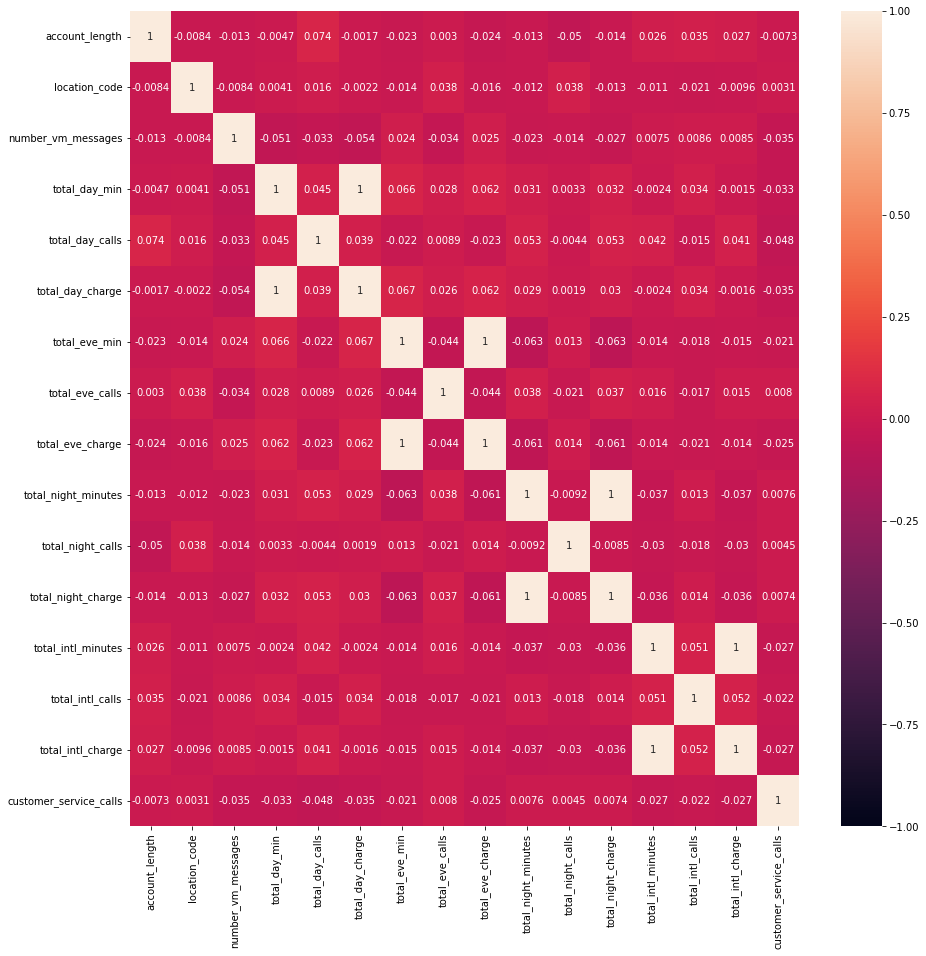

In [30]:
corr_test_2 = df_test.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_test_2, vmin=-1, vmax=1, annot=True)

In [31]:
# numerical

In [32]:
correlated_sets =[['total_day_charge','total_day_min'],
                  ['total_eve_charge','total_eve_min'],
                  ['total_night_charge','total_night_minutes'],
                  ['total_intl_charge', 'total_intl_minutes']]

In [33]:
# [['total_day_charge','total_day_min']]

In [34]:
83.6
236.9
266.7
231.2
150.6

150.6

In [35]:
df_train[df_train['total_day_charge'].isnull()][['total_day_charge','total_day_min']]

,total_day_charge,total_day_min
298,NaN,83.6
525,NaN,236.9
1118,NaN,NaN
1132,NaN,NaN
1767,NaN,266.7
1887,NaN,231.2
2200,NaN,150.6


In [36]:
df_train[df_train['total_day_min'].isnull()][['total_day_charge','total_day_min']]

,total_day_charge,total_day_min
851,48.26,NaN
1118,NaN,NaN
1132,NaN,NaN
1328,29.09,NaN
1882,38.88,NaN
2090,23.02,NaN


In [37]:
# [['total_eve_charge','total_eve_min']]

In [38]:
df_train[df_train['total_eve_charge'].isnull()][  ['total_eve_charge','total_eve_min']]

,total_eve_charge,total_eve_min
11,NaN,203.8
298,NaN,203.9
654,NaN,250.2
1118,NaN,170.0
1379,NaN,273.0
1447,NaN,287.3
1882,NaN,168.7
2090,NaN,205.9


In [39]:
df_train[df_train['total_eve_min'].isnull()][  ['total_eve_charge','total_eve_min']]

,total_eve_charge,total_eve_min
312,8.78,NaN
380,15.84,NaN
492,17.82,NaN
790,10.69,NaN
1109,22.18,NaN


In [40]:
#['total_night_charge','total_night_minutes'],

In [41]:
df_train[df_train['total_night_charge'].isnull()][  ['total_night_charge','total_night_minutes']]

,total_night_charge,total_night_minutes
129,NaN,203.3
180,NaN,224.6
579,NaN,70.6
618,NaN,169.4
654,NaN,144.9
678,NaN,189.4


In [42]:
df_train[df_train['total_night_minutes'].isnull()][  ['total_night_charge','total_night_minutes']]

,total_night_charge,total_night_minutes
324,9.37,NaN
647,5.36,NaN
1009,8.87,NaN


In [43]:
# ['total_intl_charge', 'total_intl_minutes']

In [44]:
df_train[df_train['total_intl_charge'].isnull()][['total_intl_charge', 'total_intl_minutes']]

,total_intl_charge,total_intl_minutes
339,NaN,11.8
1131,NaN,10.5
1886,NaN,9.6
2004,NaN,12.4
2072,NaN,7.4


In [45]:
df_train[df_train['total_intl_minutes'].isnull()][['total_intl_charge', 'total_intl_minutes']]

,total_intl_charge,total_intl_minutes
195,2.51,NaN
298,2.19,NaN
789,3.78,NaN
900,2.21,NaN
1128,2.03,NaN


In [46]:
def mice_imputation(df,sets):
    for s in sets:
        lr = LinearRegression()
        imp = IterativeImputer(estimator=lr, verbose=2, max_iter=30, tol=1e-10, imputation_order='roman',random_state=0)
        return pd.DataFrame(imp.fit_transform(df[s]),columns=s)


In [47]:
df_train_2 =df_train.copy()
df_train_2=mice_imputation(df_train_2,[['total_day_charge','total_day_min']])

[IterativeImputer] Completing matrix with shape (2312, 2)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.01
[IterativeImputer] Change: 101.60298175986293, scaled tolerance: 3.508e-08 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.01
[IterativeImputer] Change: 0.006789301436633366, scaled tolerance: 3.508e-08 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.02
[IterativeImputer] Change: 4.7000597191981797e-08, scaled tolerance: 3.508e-08 
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.02
[IterativeImputer] Change: 3.694822225952521e-13, scaled tolerance: 3.508e-08 
[IterativeImputer] Early stopping criterion reached.


In [48]:
df_train_2.isnull().sum()

total_day_charge    0
total_day_min       0
dtype: int64

In [49]:
df_train_2[:][298]

KeyError: 298

In [ ]:
df_train[df_train['total_day_charge'].isnull()][['total_day_charge','total_day_min']]

In [ ]:
df_train[['total_day_charge','total_day_min']].iloc[[298,525,1118,1132,1767,1887,2200]]

In [ ]:
df_train_2.iloc[[298,524,525,1118,1132,1767]]

In [ ]:
298,,83.6
525,,236.9
1118,,
1132,,
1767,,266.7
1887,,231.2
2200,,150.6


In [ ]:
corr_test_2 = df_test.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_test_2, vmin=-1, vmax=1, annot=True)

In [ ]:
 # ['total_eve_charge','total_eve_min'],
df_train_3 =df_train.copy()
df_train_3=mice_imputation(df_train_3,[['total_eve_charge','total_eve_min']])

In [ ]:
df_train[  ['total_eve_charge','total_eve_min']]

In [ ]:
df_train_3

In [ ]:
def isNaN(num):
    if float('-inf') < float(num) < float('inf'):
        return False
    else:
        return True


In [ ]:
def regression_imputation(df,sets):
    for s in sets:
        print(s)
        df.loc[df[s[0]].isnull() & df_train[s[1]].isnull(),s[0]]=df[s[0]].median()
        df.loc[df[s[0]].isnull() & df_train[s[1]].isnull(),s[1]]=df[s[1]].median()

        lr_0 = LinearRegression()
        lr_1 = LinearRegression()
        valid =df.dropna(subset=s)
        # train_set_0 =df.dropna(subset=[s[0]])[s]
        # train_set_1 =df.dropna(subset=[s[1]])[s]
        # return valid

        a=valid[[s[0]]]
        b=valid[[s[1]]]
        # print(a)
        lr_0.fit(a,b)
        lr_1.fit(b,a)
        #
        #
        #
        for i in df.index:
            if isNaN(df[s[0]][i]) :

                v=np.array([[df[s[1]][i]]])
                df[s[0]][i]=lr_1.predict(v)[0][0]
            elif  isNaN(df[s[1]][i]):
                v=np.array([[df[s[0]][i]]])
                df[s[1]][i]=lr_0.predict(v)[0][0]


    return df
        # df.loc[df[s[1]].isnull(),s[1]] = lr_0.predict(df[[s[0]]])[df[s[1]].isnull()]
        # df.loc[df[s[0]].isnull(),s[0]] = lr_1.predict(df[[s[1]]])[df[s[0]].isnull()]


In [ ]:
x=['total_day_charge','total_day_min']
df_train.loc[df_train[x[0]].isnull() & df_train[x[1]].isnull(),'total_day_charge']

In [ ]:
x=['total_intl_charge', 'total_intl_minutes']
df_train.loc[df_train[x[0]].isnull() & df_train[x[1]].isnull()]

In [ ]:
df_train_4 = df_train.copy()
df_train_4=regression_imputation(df_train_4,[['total_day_charge','total_day_min']])

In [ ]:
x=['total_day_charge','total_day_min']
df_train_4.loc[df_train_4[x[0]].isnull() & df_train_4[x[1]].isnull(),'total_day_charge']

In [ ]:
x=['total_day_charge','total_day_min']
df_train[~df_train[x[0]].isnull() & ~df_train[x[1]].isnull()].isnull().sum()

In [ ]:
regression_imputation(df_train_4,[['total_day_charge','total_day_min']])

In [ ]:
df_train_4 = df_train.copy()
x=df_train_4.dropna(subset=['total_day_charge'])[['total_day_charge','total_day_min']]

In [ ]:
x

In [ ]:
df_train_4.shape,df_train.shape,x.shape

In [ ]:
len(df_train)

In [ ]:
df_train_4 = df_train.copy()
correlated_sets =[['total_day_charge','total_day_min'],
                  ['total_eve_charge','total_eve_min'],
                  ['total_night_charge','total_night_minutes'],
                  ['total_intl_charge', 'total_intl_minutes']]
df_train_4=regression_imputation(df_train_4,correlated_sets)

In [ ]:
df_train_4[['total_day_charge','total_day_min','total_eve_charge','total_eve_min','total_night_charge','total_night_minutes','total_intl_charge', 'total_intl_minutes']].isnull().sum()

In [ ]:
df_train_4.isnull().sum()

In [ ]:
df_train.mode()

In [ ]:
df_test.mode()

In [ ]:
def categorical_features_imputation(df,features):
    for f in features:
        mode=df_train[~df_train[f].isnull()][f].value_counts().idxmax()
        print(mode)
        df[f]=df[f].fillna(mode)
    return df

In [ ]:
categorical

In [ ]:
df_train_5 =df_train.copy()
df_train_5=categorical_features_imputation(df_train_5,categorical)

In [ ]:
df_train_5

In [ ]:
df_train_5.isnull().sum()

In [ ]:
df_train_4.mean()

In [ ]:
df_train[['total_day_charge','total_day_min']]

In [ ]:
corr= df_train_4.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

In [ ]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [ ]:

def imputation(df,missing_columns):
    deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

    for feature in missing_columns:

        deter_data["Det" + feature] = df[feature + "_imp"]
        parameters = list(set(missing_columns) - set(feature))

        #Create a Linear Regression model to estimate the missing data
        model = LinearRegression()
        model.fit(X = df[parameters], y = df[feature ])

        #observe that I preserve the index of the missing data from the original dataframe
        deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

    return deter_data

In [ ]:
df_train_5= df_train.copy()
df_train_5['total_day_charge'][]

In [ ]:
missing_columns =['total_day_charge','total_day_min']
df_train_5= df_train.copy()
deter_data = imputation(df_train_5,missing_columns)